# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('C:/Users\MJHwang/Documents/카카오톡 받은 파일/mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

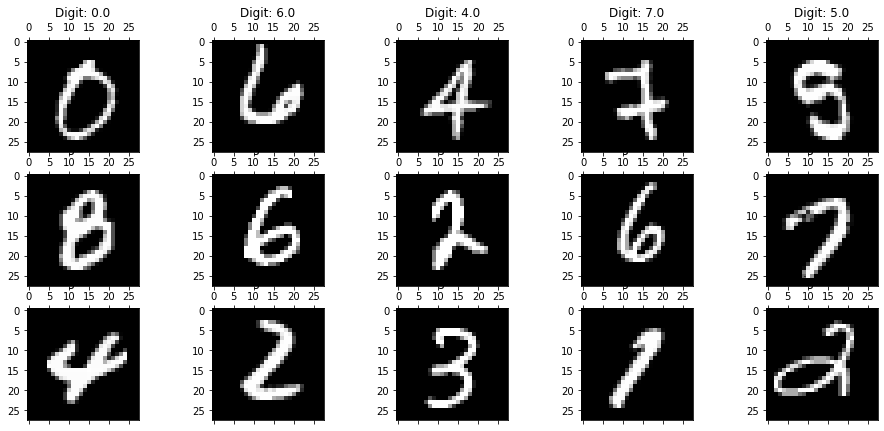

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

- PCA

⑴ 주성분 갯수 선택하기

In [10]:
len(X_train[0])

784

In [11]:
from sklearn.decomposition import PCA

variance_ratio = {}

for i in range(1, 101):
    # 주성분 갯수를 1부터 100개까지 증가하면서 누적분산비율 확인하기
    pca = PCA(n_components=i)
    pca.fit(X_train)
    # 개수별 누적 분산비율 넣기
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()

- 주성분을 하나만 사용하면, 전체 데이터의 약 10%만 설명 가능하다.
- 주성분을 5개 사용시, 전체 데이터의 약 33% 설명 가능하다.

Elbow point    
곡선의 기울기가 급격히 감소하는 지점

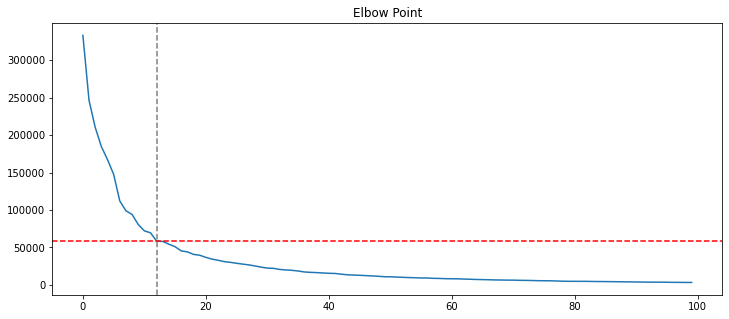

In [12]:
# eigen value
eigen_value = np.sort(pca.explained_variance_)[::-1]

plt.figure(figsize=(12, 5))

plt.plot(eigen_value)
plt.axhline(eigen_value[13], color = 'red', ls = '--')
plt.title('Elbow Point')
plt.axvline(12, ls='--', color='grey')

plt.show()

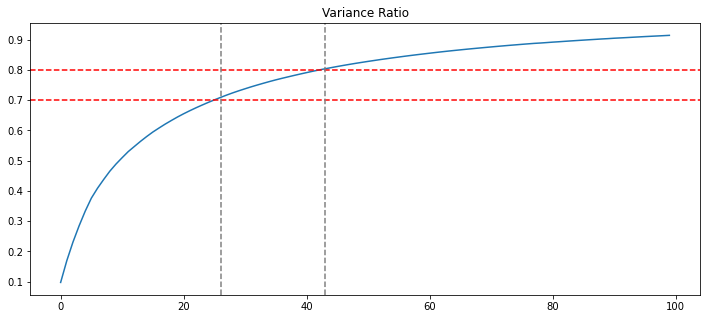

In [13]:
# variance_ratio
plt.figure(figsize=(12, 5))

plt.plot(variance_ratio.values())
plt.axhline(0.7, color = 'red', ls = '--')
plt.axhline(0.8, color = 'red', ls = '--')
plt.title('Variance Ratio')
plt.axvline(26, ls='--', color='grey')
plt.axvline(43, ls='--', color='grey')

plt.show()

In [14]:
variance_ratio

{'n_1': 0.09718619261744962,
 'n_2': 0.16903041435138416,
 'n_3': 0.23042895479930775,
 'n_4': 0.28433891573717923,
 'n_5': 0.333148335653846,
 'n_6': 0.376241059574022,
 'n_7': 0.40894388101911705,
 'n_8': 0.4378135964620937,
 'n_9': 0.46525681936374963,
 'n_10': 0.4887993359147506,
 'n_11': 0.5098574282408403,
 'n_12': 0.5301567964846037,
 'n_13': 0.5472114684282954,
 'n_14': 0.5641392122704599,
 'n_15': 0.5799998231059437,
 'n_16': 0.5948771050015509,
 'n_17': 0.6081194143312709,
 'n_18': 0.6209943687884514,
 'n_19': 0.6328841768661276,
 'n_20': 0.6444496298014083,
 'n_21': 0.6551785146286719,
 'n_22': 0.6652508403052955,
 'n_23': 0.674855785780325,
 'n_24': 0.6839287705017203,
 'n_25': 0.6927264788983836,
 'n_26': 0.7011500930938556,
 'n_27': 0.7092415893242244,
 'n_28': 0.7170644142879362,
 'n_29': 0.7244586946224385,
 'n_30': 0.7313914766032581,
 'n_31': 0.7379580009631989,
 'n_32': 0.7444193561824206,
 'n_33': 0.7504538070579811,
 'n_34': 0.7563027287587509,
 'n_35': 0.761987773

26개의 주성분으로 차원 축소

In [15]:
pca = PCA(n_components = 26)
pca.fit(X_train)

train_pca = pd.DataFrame(pca.transform(X_train))
test_pca = pd.DataFrame(pca.transform(X_test))

In [16]:
train_pca

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-273.473755,-162.771200,686.353102,-63.335915,-163.267003,-312.561496,-299.013167,130.945910,143.947416,-41.100083,...,-441.777277,-93.239187,-251.904203,258.739298,36.065408,31.675325,148.382381,84.199854,-83.540788,219.145262
1,-111.098855,757.857801,251.931907,-192.560887,-491.951880,564.477412,498.206285,176.873112,-117.919111,-411.641722,...,45.324882,-120.712775,-162.396541,-166.183222,212.891065,-396.854233,-154.926165,112.640693,329.532242,-51.417087
2,393.778000,-271.390177,672.412530,-183.780684,-568.819602,-582.473665,-268.595680,155.192997,-175.640669,-64.593181,...,-209.495380,-62.504943,-42.974471,305.022834,249.521069,-183.692382,-59.817246,313.653417,310.762062,258.130186
3,-1013.322142,-224.916391,4.117077,-33.958316,-208.647098,-282.895045,431.783119,-272.702813,36.024407,76.862275,...,292.278770,171.287617,16.849070,-74.741845,-15.989042,-62.828008,37.673429,-33.616581,-117.670622,185.019638
4,54.484327,862.411039,-557.980863,296.346905,253.246310,322.211291,-429.219563,387.325258,357.760299,412.728460,...,-190.368706,217.678797,-141.055776,24.559219,146.902727,392.090285,-57.959159,33.233426,330.042790,52.532016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,-361.017435,809.386392,-531.140136,-90.274577,-391.580204,6.316673,173.368624,554.976254,-83.190943,448.635259,...,-162.763104,161.043830,93.113863,149.284226,168.352291,-73.661911,68.565980,-129.059323,241.538481,73.375315
55996,1.226688,-181.162444,484.729092,534.871064,-105.628019,-652.337893,-53.897750,-77.758406,-18.176131,-72.895167,...,-288.737128,141.820149,82.756098,157.424930,142.782587,258.669234,60.817479,85.687887,51.610909,303.085358
55997,-889.056059,-293.196349,-53.527245,209.906586,-628.720548,-249.399632,197.304618,-172.991793,-162.949986,18.089547,...,138.012442,104.842803,-80.010133,-94.600790,-2.209566,-102.855536,205.038008,62.175005,-199.249978,41.804843
55998,176.742848,-710.708963,-567.435854,0.637600,-515.046645,-281.417824,170.437780,280.723051,224.361353,-468.647086,...,393.181591,333.989711,176.750395,21.607609,521.436294,-102.460292,-64.411219,-226.090245,-10.972623,-85.179802


- LDA

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, (y_train.ravel()))
train_lda = lda.transform(X_train)
test_lda = lda.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

### 1. LogisticRegression

In [18]:
import time
from sklearn.metrics import accuracy_score

In [22]:
# 원본
from sklearn.linear_model import LogisticRegression

start = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)
accuracy1 = accuracy_score(y_test, lr_pred)
end = time.time()
print("원본데이터", "\n정확도", accuracy1, "\n시간",f"{end - start:.5f} sec")
print("----------------------------------------------------")

# PCA
start = time.time()
lr_pca = LogisticRegression()
lr_pca.fit(train_pca, y_train)
lr_pca_pred = lr_pca.predict(test_pca)
accuracy2 = accuracy_score(y_test, lr_pca_pred)
end = time.time()
print("PCA", "\n정확도", accuracy2, "\n시간", f"{end - start:.5f} sec")
print("----------------------------------------------------")


# LDA
start = time.time()
lr_lda = LogisticRegression()
lr_lda.fit(train_lda, y_train)
lr_lda_pred = lr_lda.predict(test_lda)
accuracy3 = accuracy_score(y_test, lr_lda_pred)
end = time.time()
print("LDA", "\n정확도", accuracy3, "\n시간", f"{end - start:.5f} sec")

C:\Users\MJHwang\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MJHwang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MJHwang\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

원본데이터 
정확도 0.9186428571428571 
시간 13.53115 sec
----------------------------------------------------


C:\Users\MJHwang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MJHwang\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PCA 
정확도 0.8877142857142857 
시간 3.60896 sec
----------------------------------------------------
LDA 
정확도 0.8832857142857143 
시간 2.11823 sec


### 2. Randomforest

In [24]:
# 원본
from sklearn.ensemble import RandomForestClassifier
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
accuracy1 = accuracy_score(y_test, rf_pred)
end = time.time()
print("원본데이터", "\n정확도", accuracy1, "\n시간",f"{end - start:.5f} sec")
print("----------------------------------------------------")


# PCA
start = time.time()
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train, y_train)
rf_pca_pred=rf_pca.predict(X_test)
accuracy2 = accuracy_score(y_test, rf_pca_pred)
end = time.time()
print("원본데이터", "\n정확도", accuracy1, "\n시간",f"{end - start:.5f} sec")
print("----------------------------------------------------")


# LDA
start = time.time()
rf_lda = RandomForestClassifier()
rf_lda.fit(train_lda, y_train)
rf_lda_pred = rf_lda.predict(test_lda)
accuracy3 = accuracy_score(y_test, rf_lda_pred)
end = time.time()
print("LDA", "\n정확도", accuracy3, "\n시간", f"{end - start:.5f} sec")

C:\Users\MJHwang\AppData\Local\Temp\ipykernel_18176\1749256504.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


원본데이터 
정확도 0.9702142857142857 
시간 29.10526 sec
----------------------------------------------------


C:\Users\MJHwang\AppData\Local\Temp\ipykernel_18176\1749256504.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_pca.fit(X_train, y_train)


원본데이터 
정확도 0.9702142857142857 
시간 30.78076 sec
----------------------------------------------------


C:\Users\MJHwang\AppData\Local\Temp\ipykernel_18176\1749256504.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_lda.fit(train_lda, y_train)


LDA 
정확도 0.9117857142857143 
시간 17.49794 sec
